# Project-->Customer Segmentation

In this project, i will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

## Read Data 

In [2]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import seaborn as sns
#to see graphs in the same jupyter notebook
%matplotlib inline
customer = pd.read_csv('customers.csv')
customer.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


Dropping the features of channel and region in order to focus the product analysis

In [3]:
customer.drop(['Region', 'Channel'], axis = 1, inplace = True)
customer.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


## Explore Data

In [4]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Fresh             440 non-null    int64
 1   Milk              440 non-null    int64
 2   Grocery           440 non-null    int64
 3   Frozen            440 non-null    int64
 4   Detergents_Paper  440 non-null    int64
 5   Delicassen        440 non-null    int64
dtypes: int64(6)
memory usage: 20.8 KB


No null values

In [5]:
customer.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


There are 440 entries in the dataset, representing different customers or transactions
#### Mean
- The mean values give you an idea of the central tendency of each product category.
- Fresh' has a mean of approximately 12,000, indicating a relatively high average spending on fresh products
#### Standard Deviation (Std)
- Higher standard deviations suggest greater variability in spending across different customers.
high standard deviations across all product categories except *frozen* suggest that customer spending varies significantly, highlighting diverse preferences and purchasing behaviors across different segments of the customer base.

In [6]:
customer.shape

(440, 6)

Sample selection - few sample data points and explore them in more detail.

In [7]:
indices = [3, 33, 333]
# Create a DataFrame of the chosen samples
samples = pd.DataFrame(customer.loc[indices], columns = customer.keys()).reset_index(drop = True)
display(samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,13265,1196,4221,6404,507,1788
1,29729,4786,7326,6130,361,1083
2,8565,4980,67298,131,38102,1215


Checking the z score of the selected random samples

<Axes: >

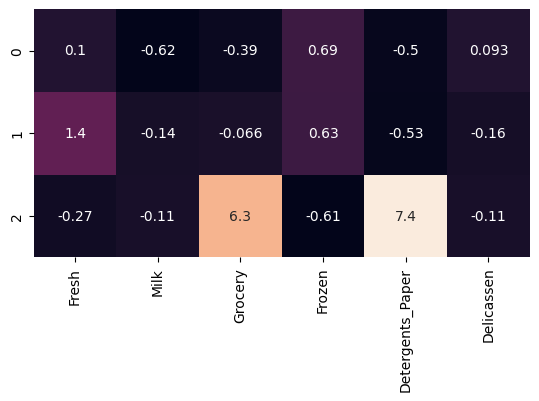

In [8]:
import seaborn as sns

sns.heatmap((samples-customer.mean())/customer.std(ddof=0), annot=True, cbar=False, square=True)

**Concept behind Z Score**
- Z-scores help identify outliers in your samples. Data points with high positive or negative Z-scores (far from zero) may be considered outliers, suggesting that they significantly deviate from the mean of the dataset
- Z-score close to zero means that the spending is close to the average spending level in the dataset.
- positive Z-score means above-average spending.
- negative Z-score means below-average spending.

### Heat Map Analysis

- **Sample 0** consumption of delicassen and fresh are close the population mean , for those products variation is low.
- **Sample 1** consumption of milk, grocery and delicassen products are close to the mean of its population. Moreover, `Fresh` is way above the mean w.r.t other products and has variance than other products
- **Sample 2** represents a factory that uses detergents and/or paper products majorly. Moreover, it has a very high requirement of groceries as well. And if we see the heatmap we can see that Sample 2 is very different from Sample 0 and 1 specially in terms of `Grocery` and `Detergents_Paper`.

### Plotting Data 

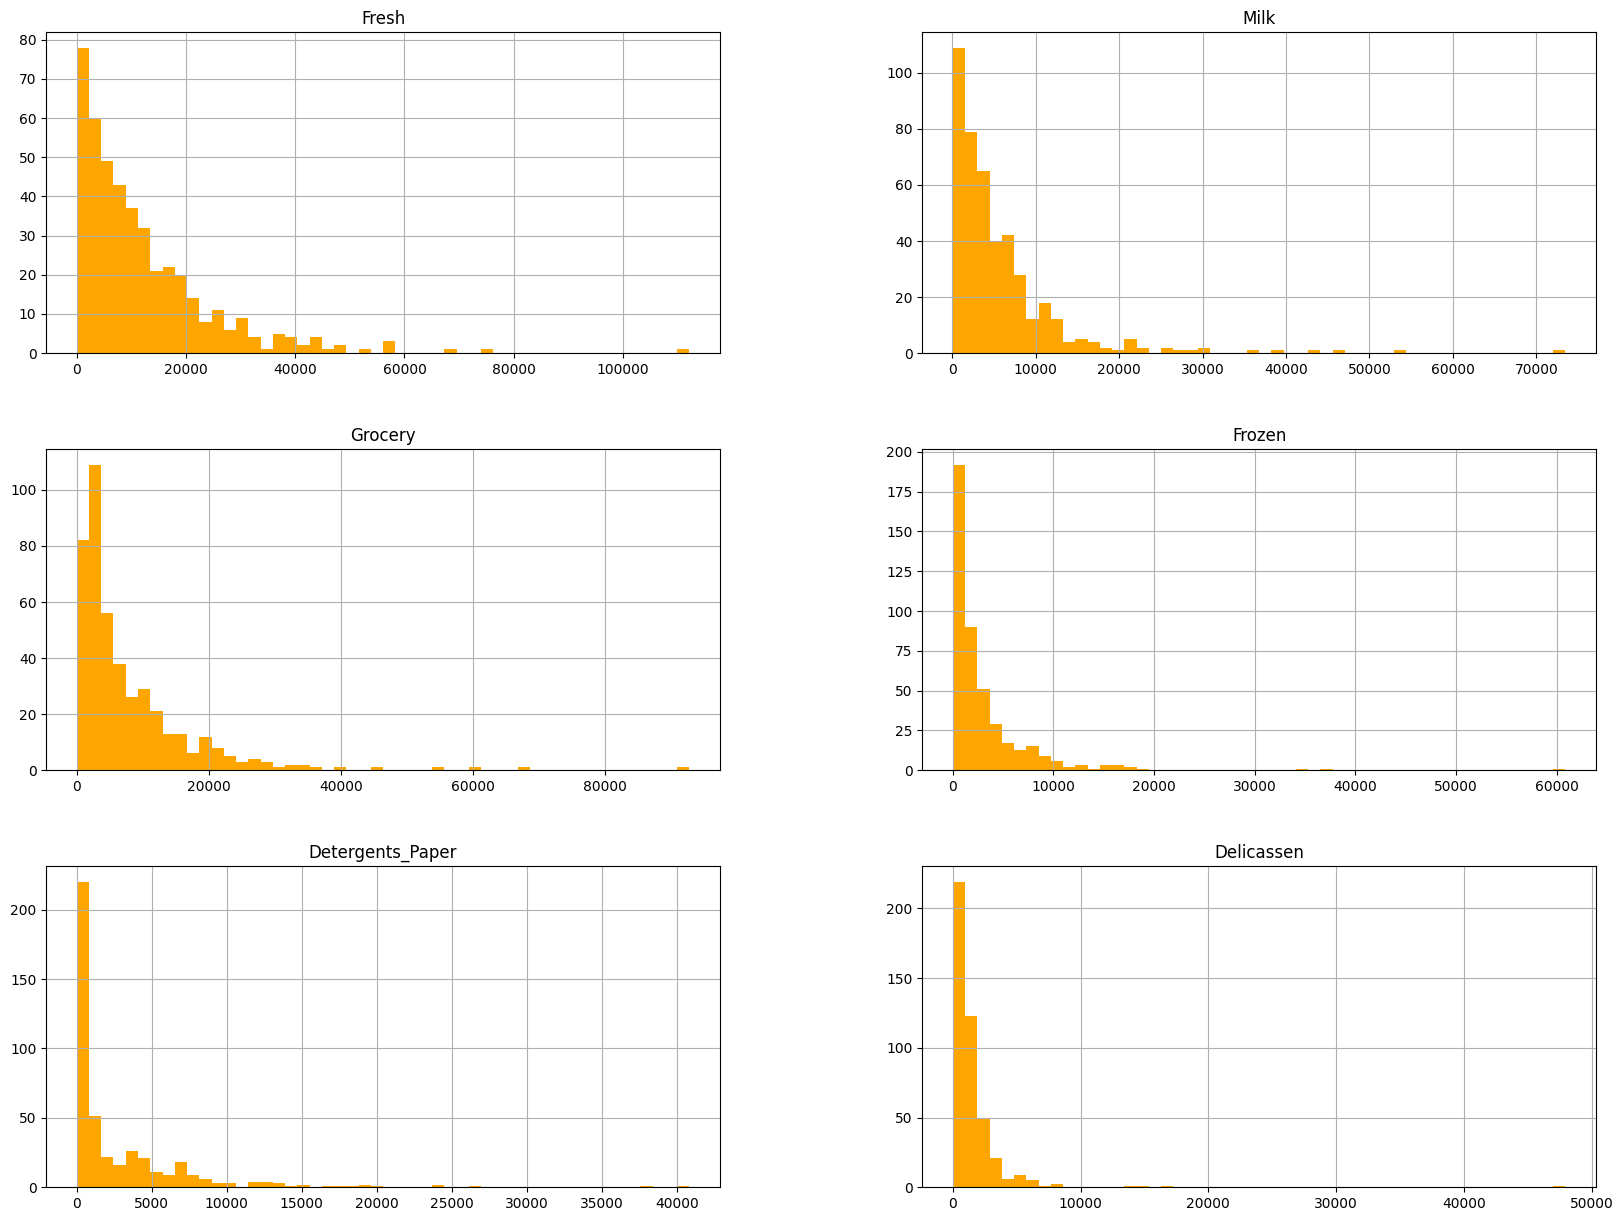

In [9]:
import matplotlib.pyplot as plt 

customer.hist(bins=50, figsize=(20,15), color = "orange")
plt.show()

### Pearson corelation test to capture the feature relevance

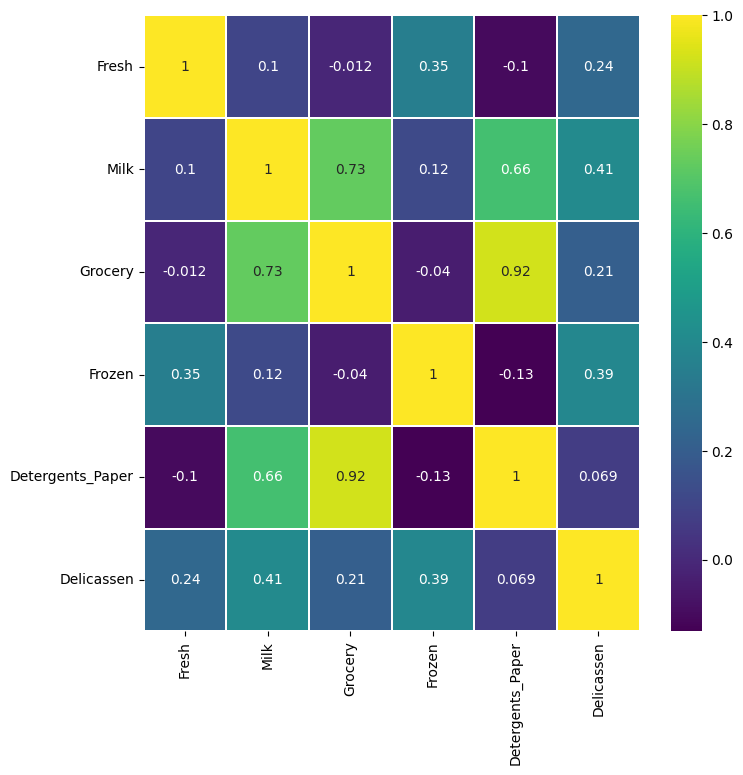

In [10]:
sns.heatmap(customer.corr(), annot=True, linewidth=0.2, annot_kws={"size":10}, cmap="viridis")
fig = plt.gcf()
fig.set_size_inches(8,8)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

**Observation**
- The pairs *Milk-Grocery* , *Grocery-Detergents_Paper* and *Detergents_Paper-Milk* show positive correlation and they are higly corelated.
- And as for the feature selected above (*Grocery*) shows some degree of positive correlation with all the other features(except frozen and fresh). This confirms the suspicions to some extent about the relevance of the feature which I tried to predict, since *Grocery* shows a correlation with other features except *Frozen* and *Fresh* but this corelation is not a tight one.
- features are positively skewed as well looking at the plots.

# Data Preprocessing

## Feature Scaling

If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most to apply non-linear scaling particularly for financial data. One way to achieve this scaling is by using Box-Cox Transform or else we can use natural logarithm. Let me test both ways.

#### Natural Logarithm

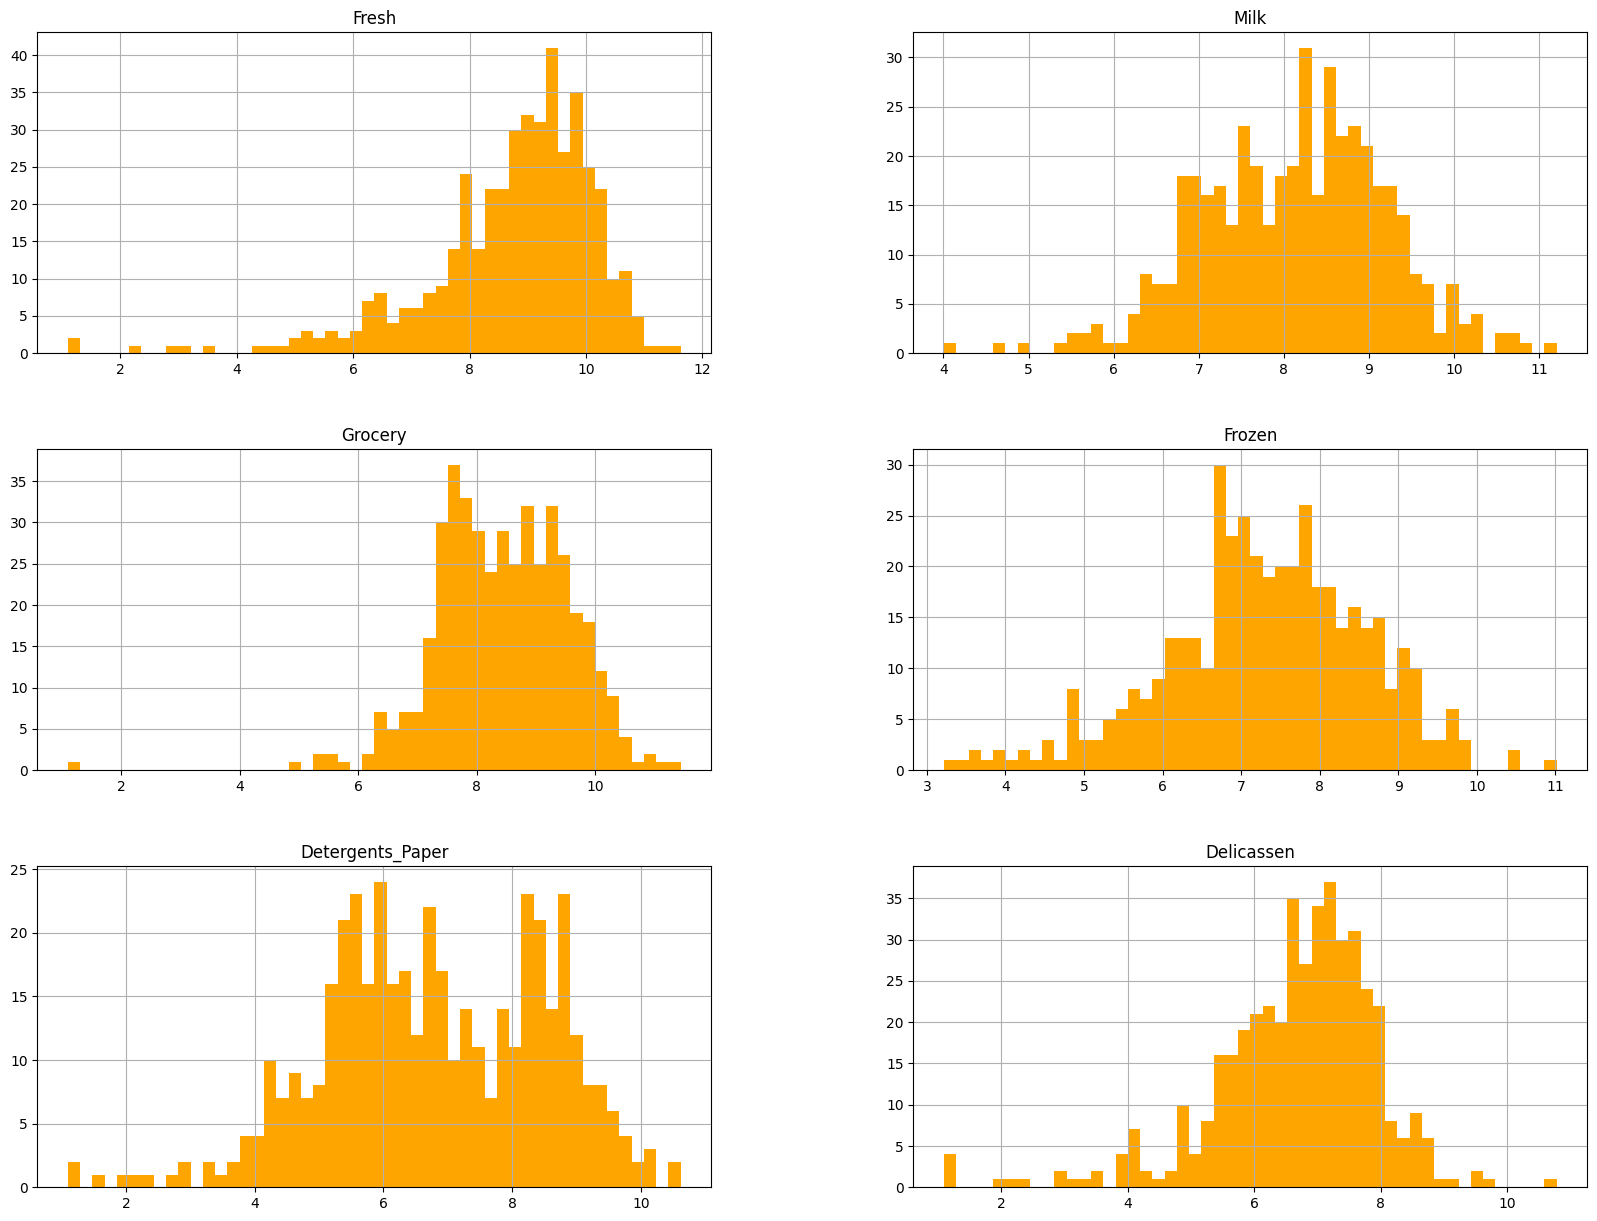

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
1,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119
2,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504
3,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853
4,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525
...,...,...,...,...,...,...
435,10.299003,9.396903,9.682030,9.483036,5.204007,7.698029
436,10.577146,7.266129,6.638568,8.414052,4.532599,7.760467
437,9.584040,9.647821,10.317020,6.079933,9.605149,7.532088
438,9.238928,7.591357,7.710653,6.945051,5.123964,7.661527


In [11]:
#Scale the data using the natural logarithm
log_data = np.log(customer)

#Scale the sample data using the natural logarithm
log_samples = np.log(samples)

log_data.hist(bins=50, figsize=(20,15), color = "orange")
plt.show()

display(log_data)

Here these values are monetary units, therfore we can use natural logarithms since all are positive values, But for own understanding im going to test box-cox (power transform) on this problem as well.

#### Box-Cox Transform

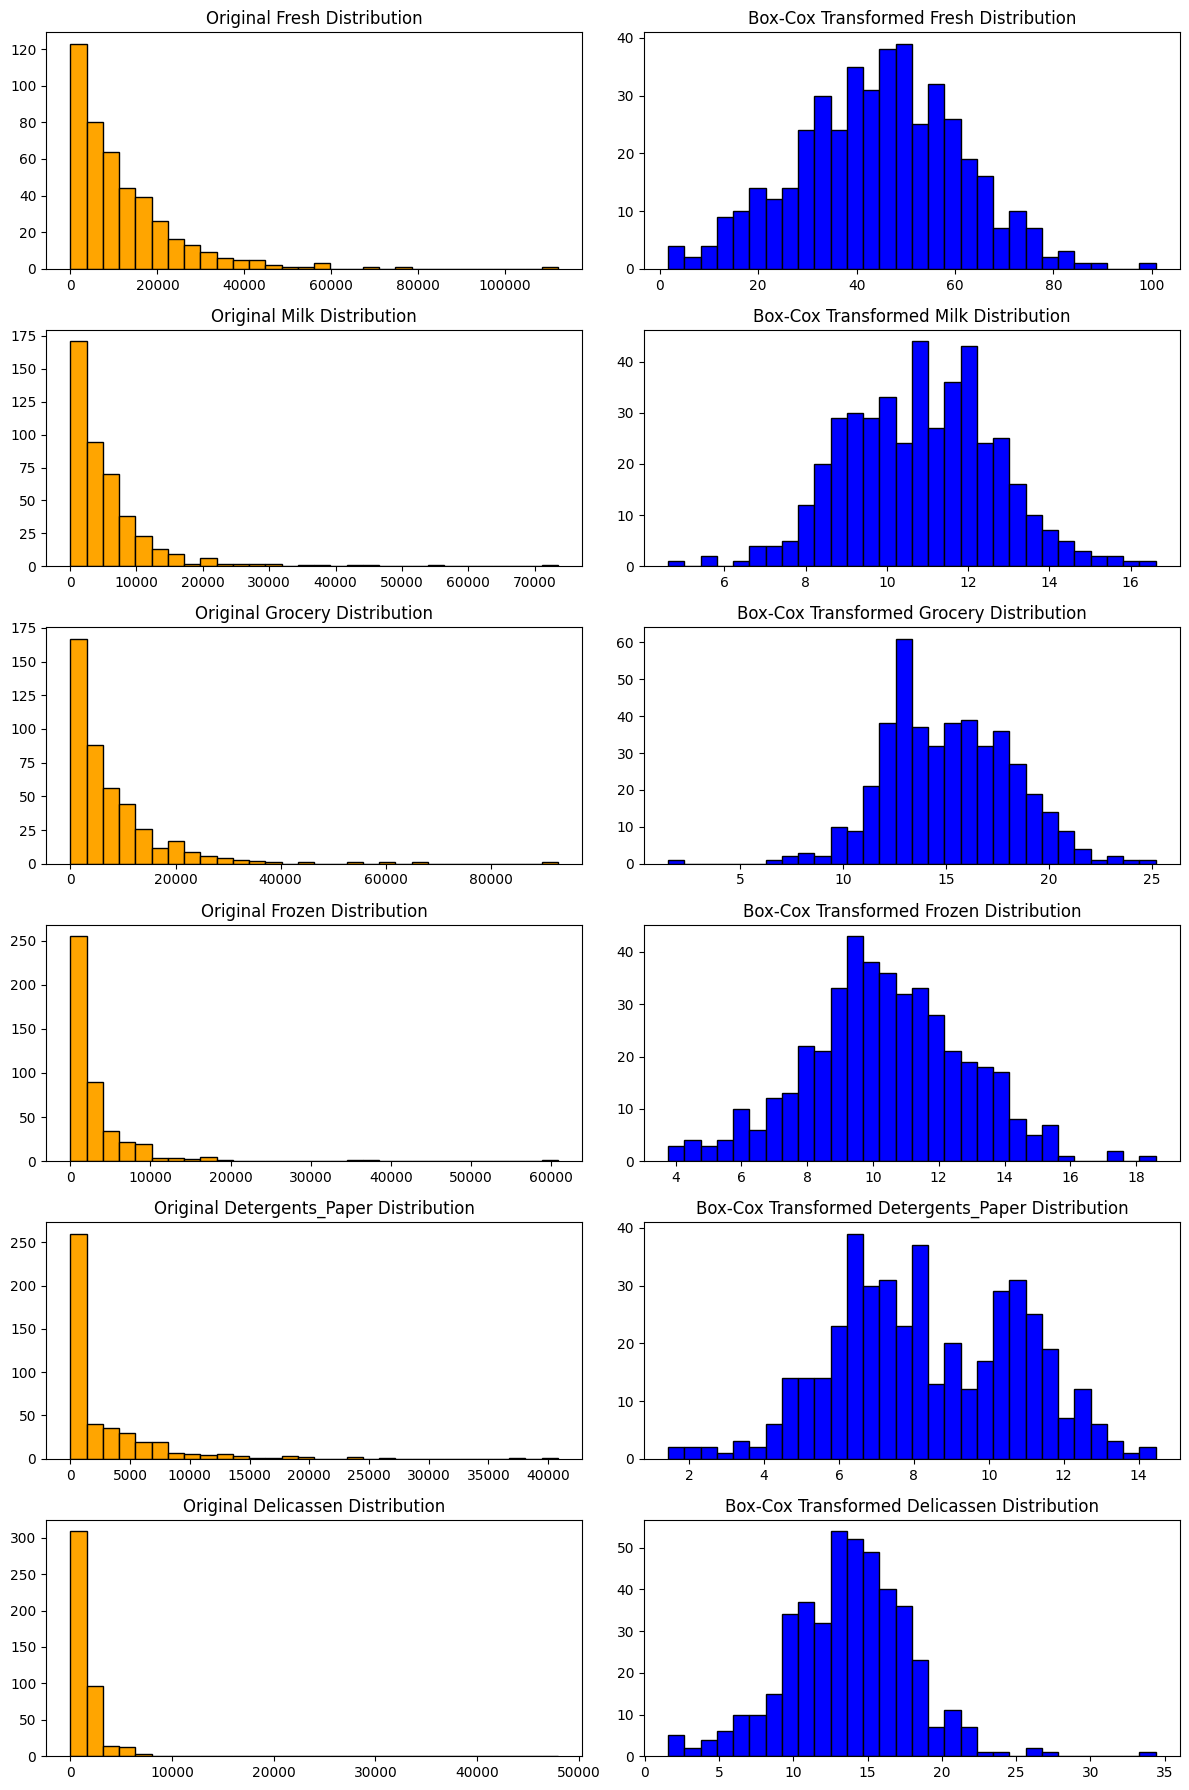

In [12]:
from scipy.stats import boxcox
import matplotlib.pyplot as plt

# Function to apply Box-Cox transform to a column and return the transformed column
def apply_boxcox(column):
    transformed_data, lam = boxcox(column + 1)  # Adding 1 to handle zero values
    return transformed_data, lam

# Specify the columns you want to transform
columns_to_transform = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

# Apply Box-Cox transform to the specified columns in the DataFrame
for a in columns_to_transform:
    transformed_data, lam = apply_boxcox(customer[a])
    customer[a + '_boxcox'] = transformed_data

# Plot the original and transformed distributions for the specified columns
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(12, 3 * 6))

for i, column in enumerate(columns_to_transform):
    axes[i, 0].hist(customer[column], bins=30, edgecolor='black', color='orange')
    axes[i, 0].set_title(f'Original {column} Distribution')

    axes[i, 1].hist(customer[column + '_boxcox'], bins=30, edgecolor='black', color='blue')
    axes[i, 1].set_title(f'Box-Cox Transformed {column} Distribution')

plt.tight_layout()
plt.show()


Box-Cox Transformed data in a pd dataframe

In [13]:
transformed_df = pd.DataFrame()

# Apply Box-Cox transform to the specified columns in the DataFrame
for a in columns_to_transform:
    transformed_data, lam = apply_boxcox(customer[a])
    transformed_df[a + '_boxcox'] = transformed_data

# Display the Box-Cox transformed data
display(transformed_df)

,Fresh_boxcox,Milk_boxcox,Grocery_boxcox,Frozen_boxcox,Detergents_Paper_boxcox,Delicassen_boxcox
0,51.417803,12.627966,16.321114,6.865346,9.898261,15.099508
1,42.744825,12.657043,17.042362,10.573007,10.222421,16.203524
2,41.339338,12.459656,16.369883,11.181489,10.325210,23.048894
3,52.164618,9.046366,14.623169,13.209915,7.440912,16.230491
4,61.612680,11.584136,16.173020,12.168787,9.272923,20.947768
...,...,...,...,...,...,...
435,67.045314,13.037918,18.698220,14.813103,6.039063,17.085180
436,73.055859,9.334791,10.297295,12.463501,5.166199,17.346803
437,53.675704,13.509508,20.887195,8.043217,12.681387,16.404436
438,48.162513,9.866602,12.902328,9.575766,5.933083,16.933630


Compared to both transforms i take box-cox transform other than the natural logartithms because it shows greater results than the logarithmic transforma at the moment

### Outlier Detection and Removal (IQR method)

In [14]:
outliers = []

# For each feature find the data points with extreme high or low values
for feature in transformed_df.keys():
    
    # Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = transformed_df[feature].quantile(0.25)
    
    # Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = transformed_df[feature].quantile(0.75)
    
    # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3 - Q1)
    
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    display(transformed_df[~((transformed_df[feature] >= Q1 - step) & (transformed_df[feature] <= Q3 + step))])
    
    # OPTIONAL: Select the indices for data points you wish to remove
    outliers.extend(transformed_df[(transformed_df[feature] < Q1 - step) | (transformed_df[feature] > Q3 + step)].index)
    
    print(outliers)

# Remove the duplicates from the outliers list
outliers = list(set(outliers))

# Remove the outliers, if any were specified
good_data = transformed_df.drop(outliers).reset_index(drop=True)

Data points considered outliers for the feature 'Fresh_boxcox':


,Fresh_boxcox,Milk_boxcox,Grocery_boxcox,Frozen_boxcox,Detergents_Paper_boxcox,Delicassen_boxcox
181,100.761498,14.76556,19.113231,15.378356,10.867284,23.506973


[181]
Data points considered outliers for the feature 'Milk_boxcox':


,Fresh_boxcox,Milk_boxcox,Grocery_boxcox,Frozen_boxcox,Detergents_Paper_boxcox,Delicassen_boxcox
86,61.873751,16.618353,21.103165,9.483237,13.199558,13.659899
154,19.184406,4.613351,6.787467,5.271355,2.203951,2.712296


[181, 86, 154]
Data points considered outliers for the feature 'Grocery_boxcox':


,Fresh_boxcox,Milk_boxcox,Grocery_boxcox,Frozen_boxcox,Detergents_Paper_boxcox,Delicassen_boxcox
75,59.667840,8.965652,1.51230,12.415125,1.440917,13.932553
85,55.442886,15.657509,25.19738,9.554374,14.453398,18.324200


[181, 86, 154, 75, 85]
Data points considered outliers for the feature 'Frozen_boxcox':


,Fresh_boxcox,Milk_boxcox,Grocery_boxcox,Frozen_boxcox,Detergents_Paper_boxcox,Delicassen_boxcox
38,37.260258,13.538785,18.836661,4.134632,11.418056,11.236267
57,39.289075,12.679961,17.329078,4.322876,11.556889,14.937822
65,9.209079,14.088584,22.416011,4.250378,13.527428,15.334702
93,49.622643,10.612485,12.697724,17.171156,4.825781,17.943701
145,61.120810,12.369743,21.393847,4.458229,12.402763,20.190440
183,71.659494,15.556079,19.471022,17.278407,6.403664,34.392025
325,69.078250,13.662209,18.165813,18.594195,8.771825,21.334398
420,36.904667,11.536499,18.069472,3.773066,11.385366,15.253031


[181, 86, 154, 75, 85, 38, 57, 65, 93, 145, 183, 325, 420]
Data points considered outliers for the feature 'Detergents_Paper_boxcox':


,Fresh_boxcox,Milk_boxcox,Grocery_boxcox,Frozen_boxcox,Detergents_Paper_boxcox,Delicassen_boxcox


[181, 86, 154, 75, 85, 38, 57, 65, 93, 145, 183, 325, 420]
Data points considered outliers for the feature 'Delicassen_boxcox':


,Fresh_boxcox,Milk_boxcox,Grocery_boxcox,Frozen_boxcox,Detergents_Paper_boxcox,Delicassen_boxcox
23,64.622213,15.176945,19.771672,12.744929,10.656949,27.261568
71,57.675907,9.137442,19.615693,12.833348,10.595723,26.468937
87,75.292533,11.453984,16.536293,13.178652,9.094791,26.419378
109,25.304707,13.655956,20.735425,8.793363,8.155937,1.580755
128,11.184129,12.467723,14.346692,6.222835,8.505270,1.580755
142,71.772624,12.082081,16.586955,11.620774,3.316336,1.580755
154,19.184406,4.613351,6.787467,5.271355,2.203951,2.712296
183,71.659494,15.556079,19.471022,17.278407,6.403664,34.392025
184,15.298197,8.627318,14.933163,5.251978,6.859663,3.156389
187,30.350580,12.285023,17.122987,13.163897,10.299536,1.580755


[181, 86, 154, 75, 85, 38, 57, 65, 93, 145, 183, 325, 420, 23, 71, 87, 109, 128, 142, 154, 183, 184, 187, 233]


In [15]:
good_data.shape

(418, 6)

- Good Data Plots

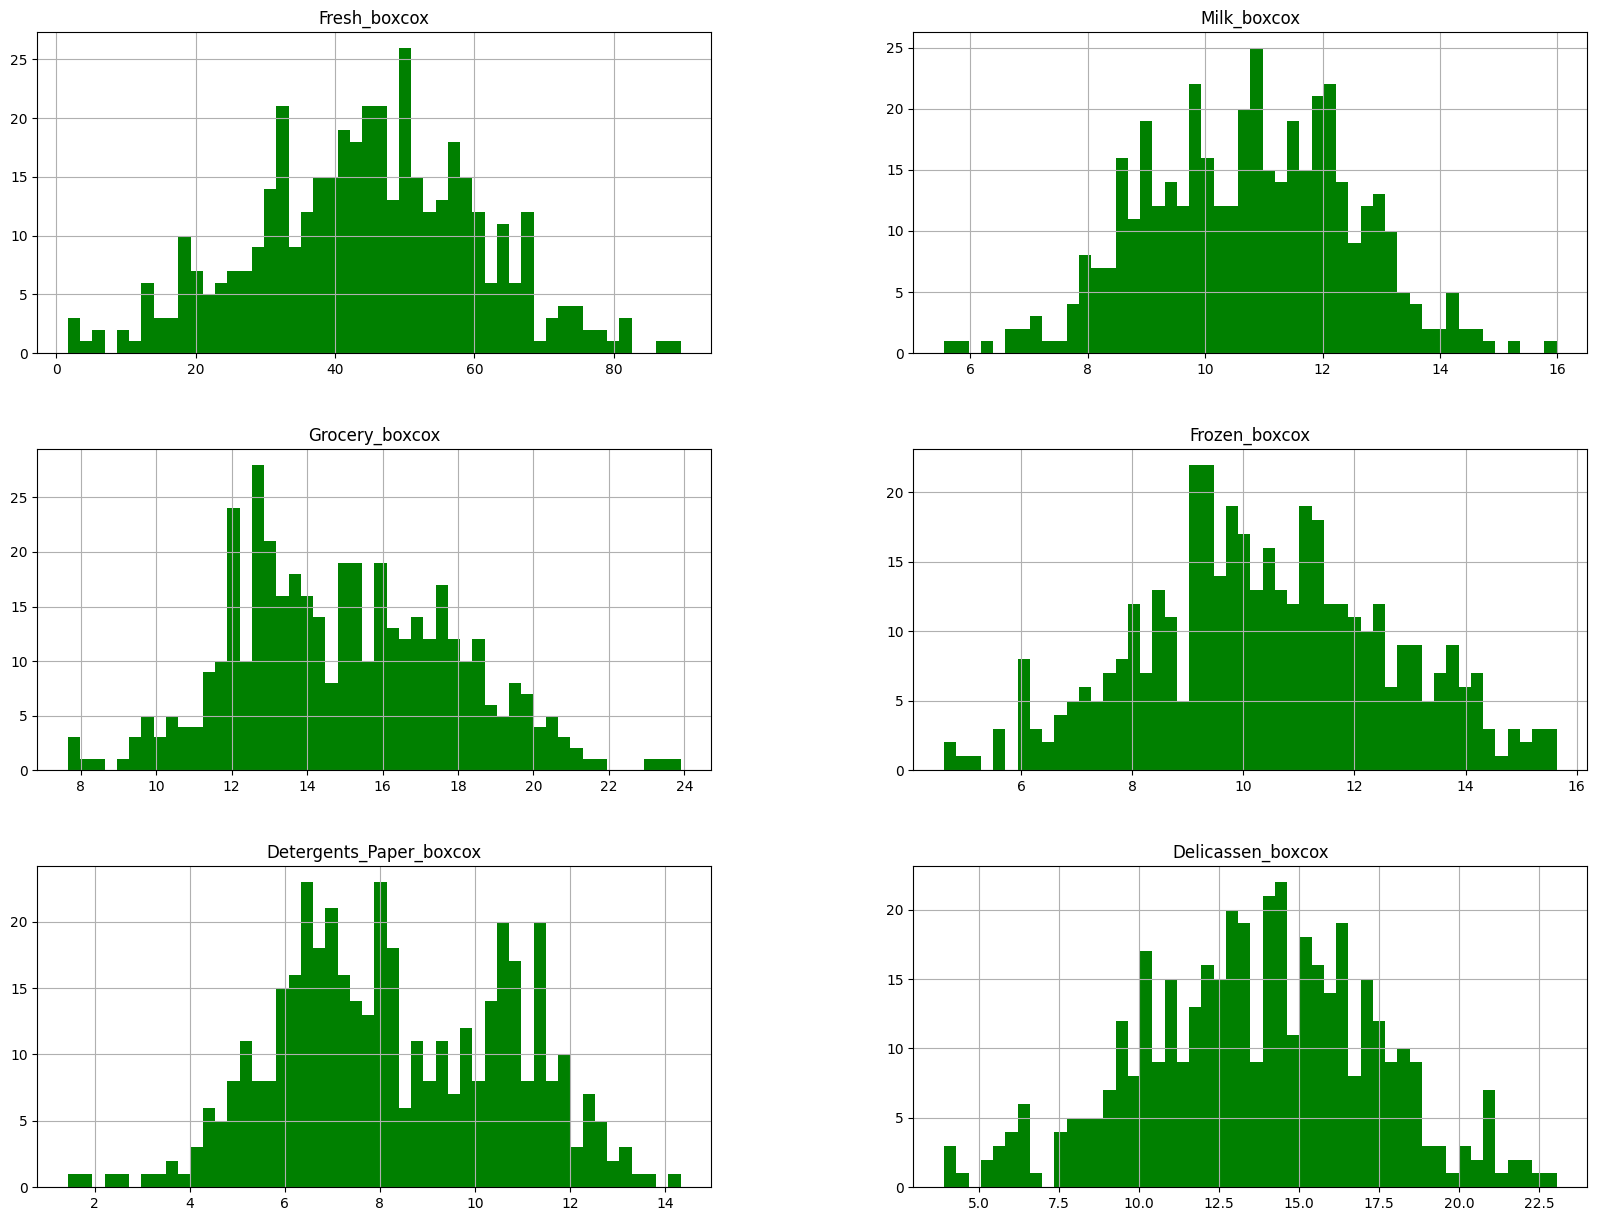

In [16]:
import matplotlib.pyplot as plt 

good_data.hist(bins=50, figsize=(20,15), color = "Green")
plt.show()

Comparing corelation matrix with original data vs transformed data

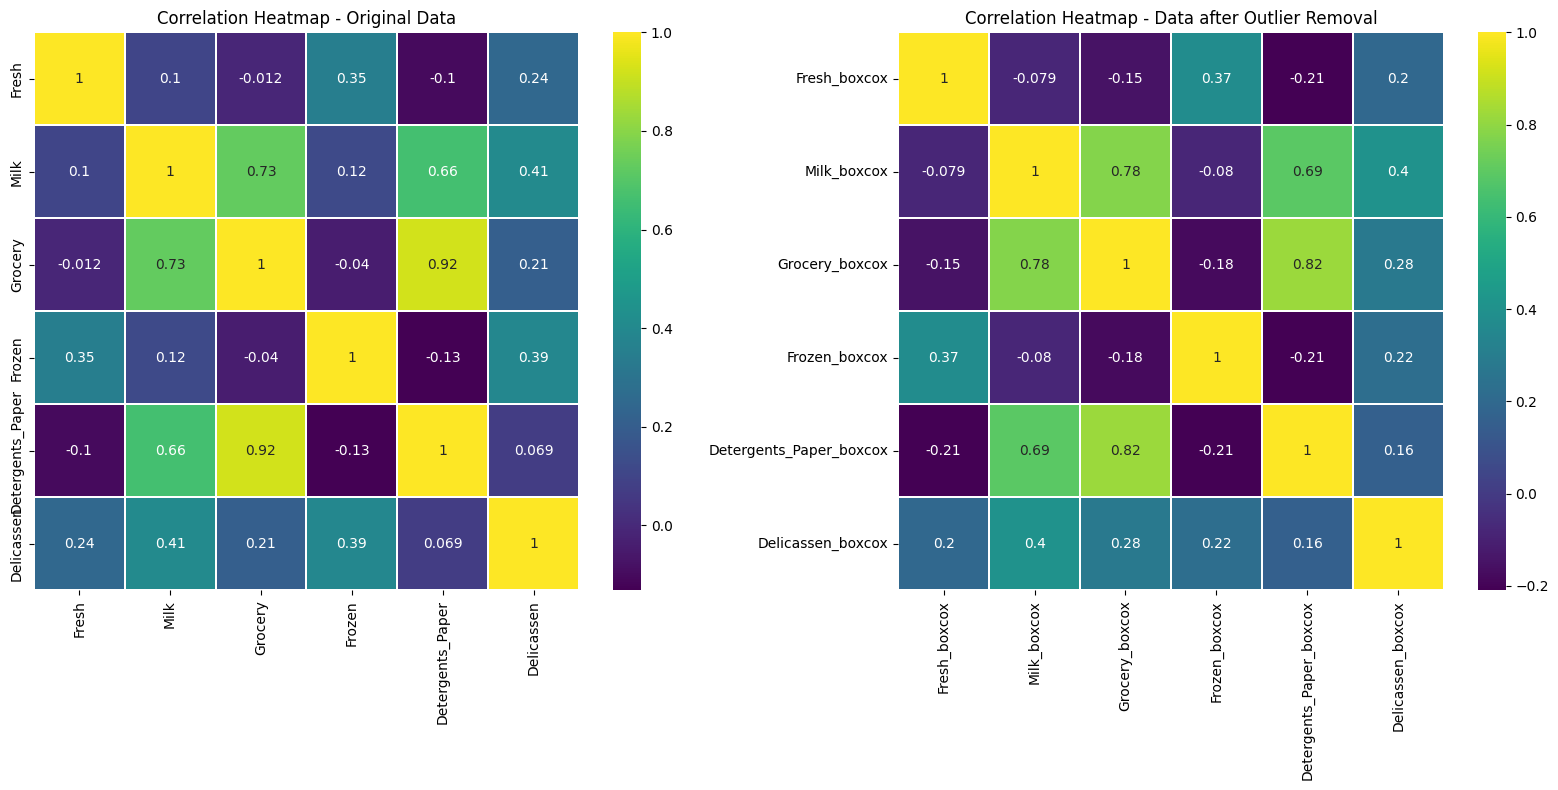

In [20]:
customer.drop(['Fresh_boxcox', 'Milk_boxcox','Grocery_boxcox' ,'Frozen_boxcox','Detergents_Paper_boxcox','Delicassen_boxcox'], axis = 1, inplace = True)
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure with 1 row and 2 columns for subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Plot the first heatmap
sns.heatmap(customer.corr(), annot=True, linewidth=0.2, annot_kws={"size": 10}, cmap="viridis", ax=axes[0])
axes[0].set_title('Correlation Heatmap - Original Data')
axes[0].tick_params(axis='both', labelsize=10)

# Plot the second heatmap
sns.heatmap(good_data.corr(), annot=True, linewidth=0.2, annot_kws={"size": 10}, cmap="viridis", ax=axes[1])
axes[1].set_title('Correlation Heatmap - Data after Outlier Removal')
axes[1].tick_params(axis='both', labelsize=10)

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

#### Observation Heatmap
- Based on the comparison between the original data and the transformed data, I can determine which correlations have increased and which have decreased. This helps identify a clear pattern in the data, which is crucial for the model.

## Feature Transformation

Principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.